# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:

df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking the Missing Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History'

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


Now, Let's drop all the missing values remaining.

In [10]:
df.dropna(inplace=True)

Let's check the Missing values for the final time!

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

# Now, Let's check the final Dataset Shape

In [12]:
df.shape

(542, 13)

# VISUALISATION

In [58]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','Loan_Amount_Term']

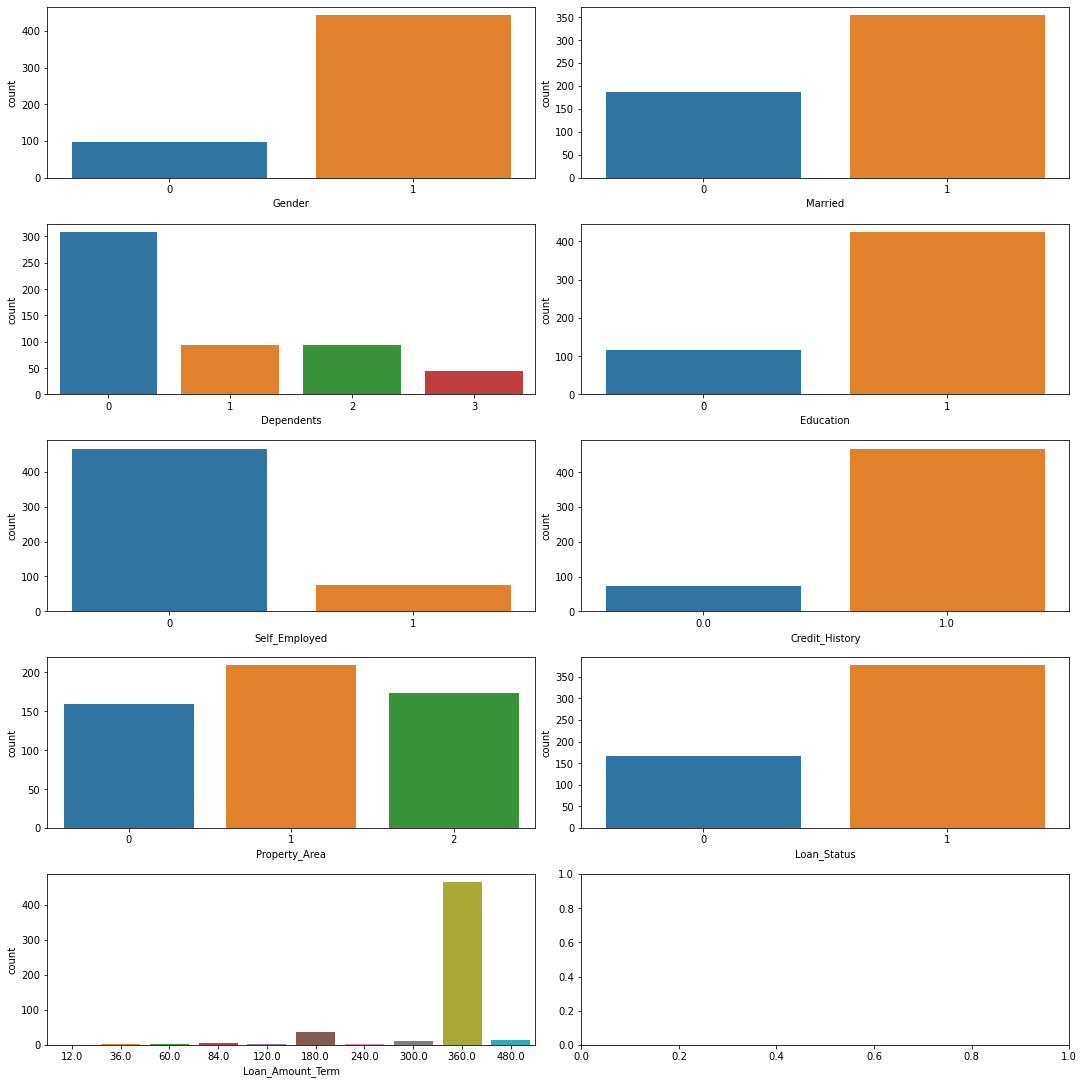

In [60]:
#plotting countplots of all categorical variables as subplots

fig, ax = plt.subplots(ncols=2 ,nrows=5 , figsize=(15,15))
index = 0
ax = ax.flatten()

for i in cat_col:
    sns.countplot(df[i],ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

Observation:
    
From the above visualisation we found out that counts of Male in our data set is more than of female, There are more frquency of applications who are married, more applications with 0 dependents and minimum with having 3+, there are more graduate, frequency of self employed is very less means. Applications with good credit history are more, maximum number of applications are of those whose property is in semiurban area and most of the applications were approved for loan and Majority of the loans taken are for 360 Months (30 years).

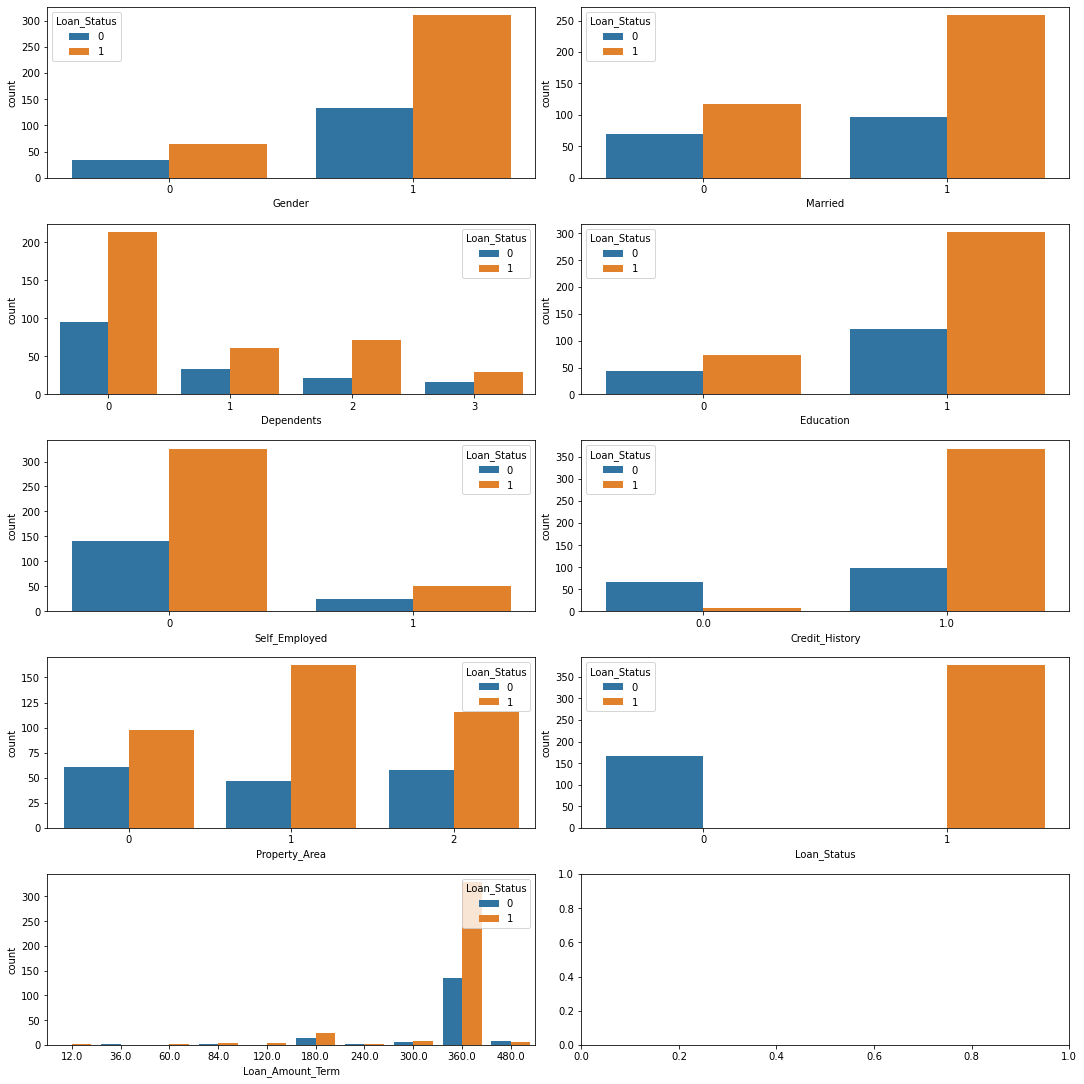

In [62]:
#plotting countplots of all categorical variables as subplots

fig, ax = plt.subplots(ncols=2 ,nrows=5 , figsize=(15,15))
index = 0
ax = ax.flatten()

for i in cat_col:
    sns.countplot(df[i],ax=ax[index],hue=df['Loan_Status'])
    index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

Approx 69% of males got approved for loan where approx 67% of females got approved for loan

approx 66% of married females got approved for loan, where approx 69% of married males got approved for loan

loan approved for 69% of applcayion having 0 dependents, 64% having 1 dependent, 76.7% having 2 dependents and 62.5% having 3+ dependetns.

70.9% of the graduates got approved for th loan , 61.65% not graduate got approved for the loan.

only 8% loan approved when credit history was 0 , where as 79.6% loan aproved where credit history was one, it clearly states that credit history is a vey imp factor for loan approval.

61.71% loan approved for property in Rural Area, 77.09% loan approved for property area in semiurban, 65.82% loan approved for property area in urban. Semiurban area has the highest loan approval.

Loan Term Amount here we can see that most of the applications for loan are for 30 years (360 months / 12 ) where 70.04% are approved for loan.

<Figure size 576x360 with 0 Axes>

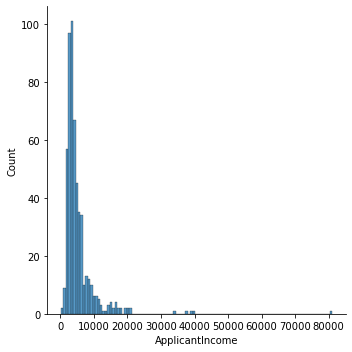

<Figure size 576x360 with 0 Axes>

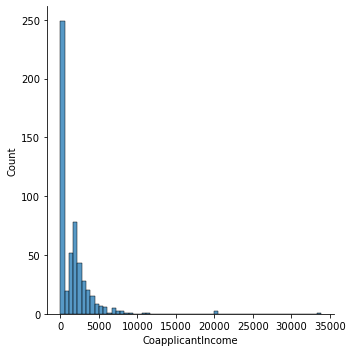

<Figure size 576x360 with 0 Axes>

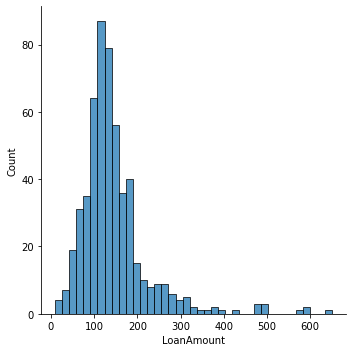

In [63]:
# checking distribution of numeric variables

num_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

for i in num_var:
    plt.figure(figsize=(8,5))
    sns.displot(df[i])
    plt.show()

we see that above numeric variables are rightly skewed and there seems outliers present in above data, we will be checking the above variables and also reduce the skewness, there are more applicants for loan amount 100-170

# Exploratory Data Analyis-EDA

Comparison between Genders in getting the Loan:

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


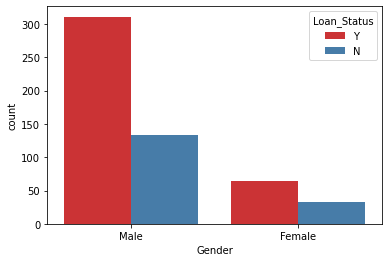

In [13]:
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Here, we can see that the Males have more chances to get the Loan.

# Comparison between Married Status in getting the Loan:

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


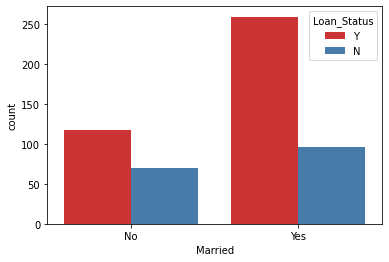

In [14]:
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Married'],df['Loan_Status']))

Here, we can see that the Married Person has more chance of getting the Loan.

# Comparison between Education Status of an Individual in getting the Loan:

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


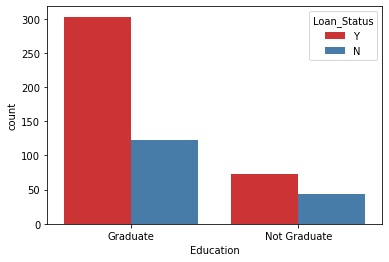

In [15]:
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Education'],df['Loan_Status']))

Here, we can see that a Graduate Individual has more chance of getting the Loan.

# Comparison between Self-Employed or Not in getting the Loan:

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


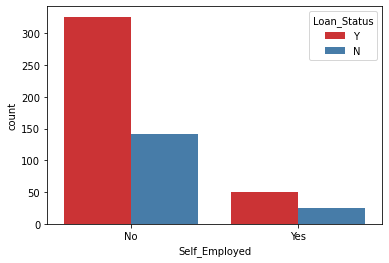

In [16]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Here, we can see that Not Self-Employed has more chance of getting the Loan.

# Comparison between Property Area for getting the Loan:

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


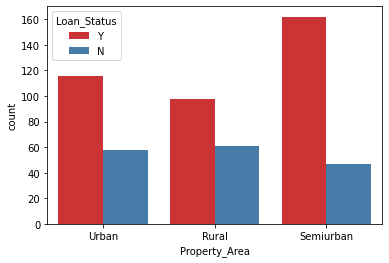

In [17]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Here, we can see that People living in Semi-Urban Area have more chance to get the Loan.

# Let's replace the Variable values to Numerical form & display the Value Counts

In [18]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [19]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [20]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [21]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [22]:

df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [23]:

df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [39]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [40]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [41]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [42]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

# Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

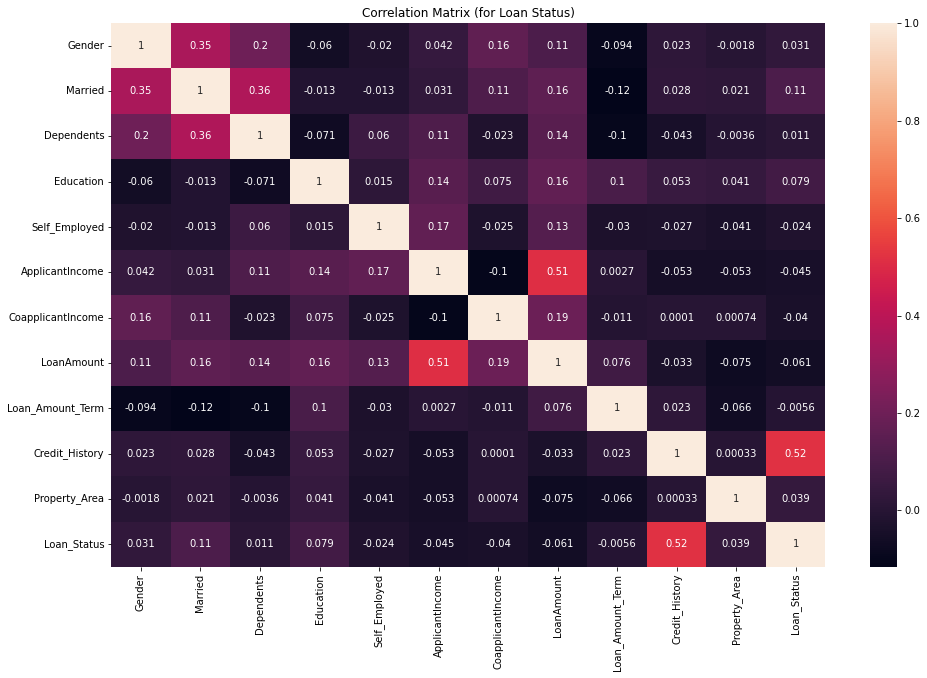

In [66]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

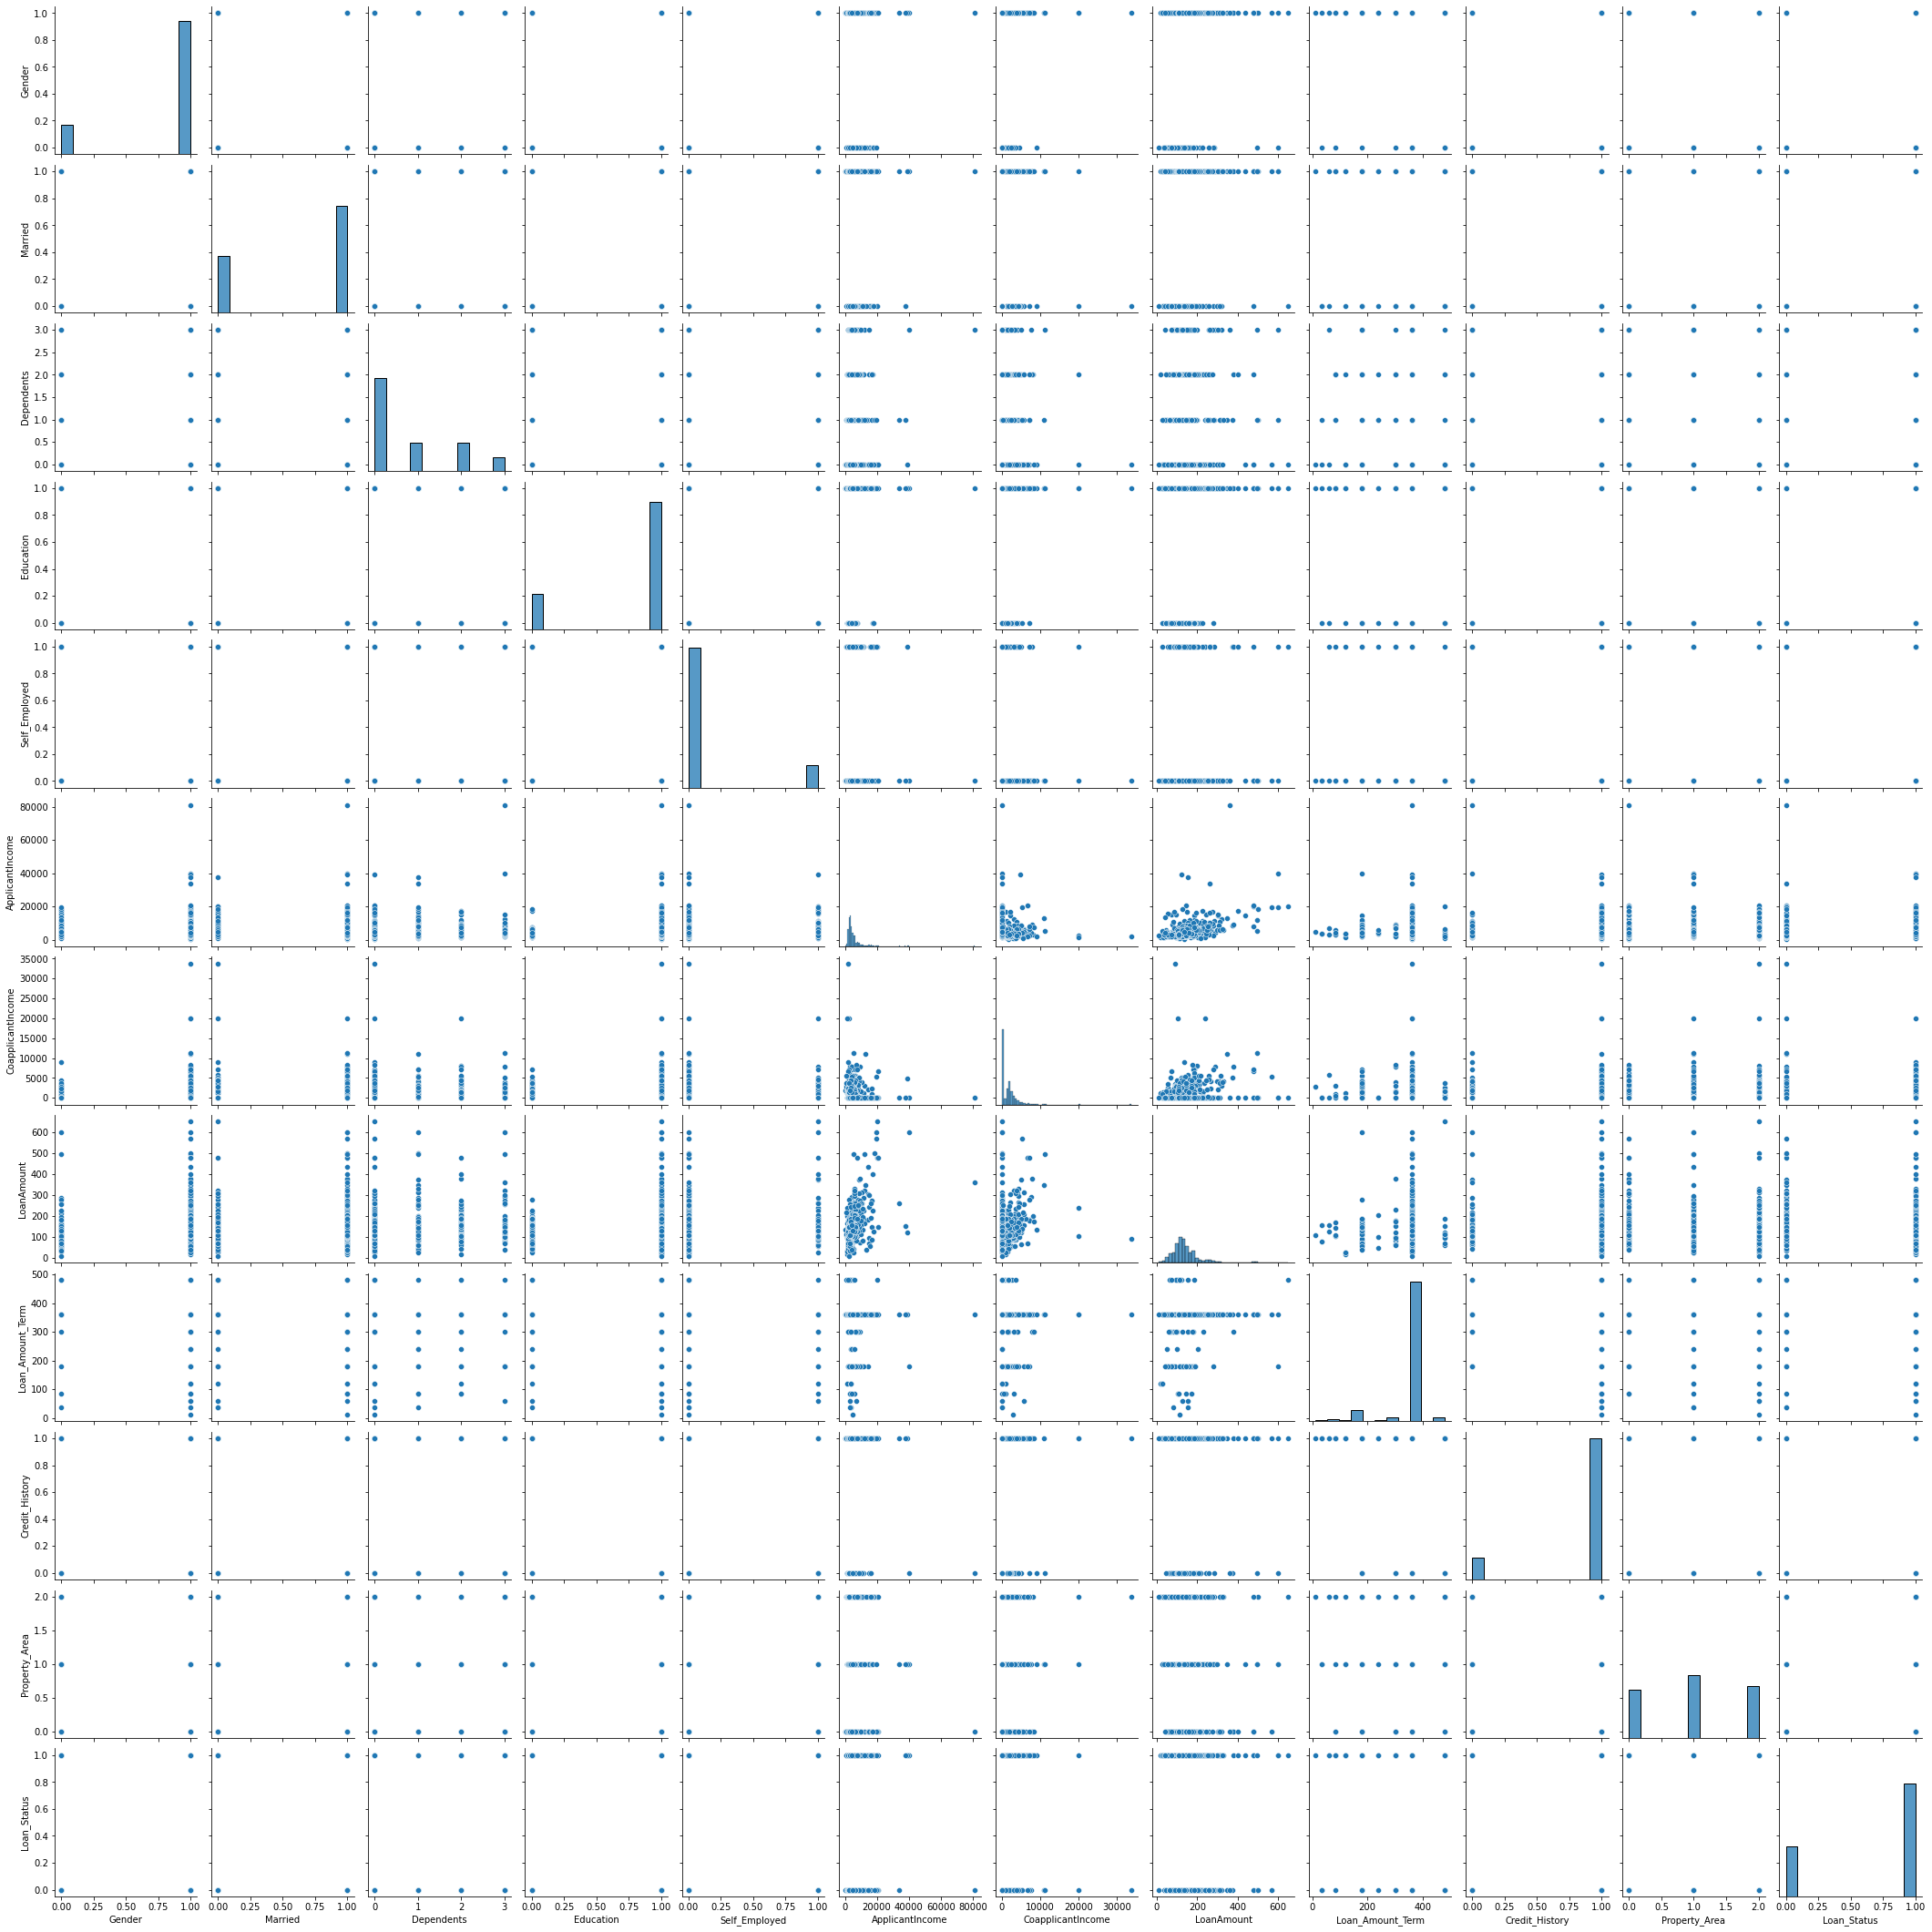

In [56]:
sns.pairplot(df)

# Final DataFrame

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Importing Packages for Classification algorithms

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Splitting the data into Train and Test set

In [47]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [49]:
print(X_train)

[[  1.   1.   3. ... 360.   1.   0.]
 [  1.   1.   2. ... 180.   1.   2.]
 [  1.   1.   1. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   0.]
 [  0.   1.   2. ... 360.   1.   1.]]


In [50]:

print(X_test)

[[  0.   1.   2. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  1.   0.   0. ... 360.   0.   0.]
 ...
 [  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   3. ... 360.   0.   1.]]


In [51]:

print(y_train)

[1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1]


# Logistic Regression (LR)

In [52]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7852760736196319


# Support Vector Machine (SVM)

In [53]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.6503067484662577


# Decision Tree

In [54]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.6871165644171779


# K-Nearest Neighbors (KNN)

In [55]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6196319018404908


CONCLUSION:

The Loan Status is heavily dependent on the Credit History for Predictions.
The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.